Notebook for visualization development of BEopt simulated HVAC data.

In [14]:
# Importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [15]:
atx_df = pd.read_csv('BEopt Viz\\atx_unmet_results_timeseries.csv')
atx_df.head()

C:\Users\micha.DESKTOP-U2HVTMF\AppData\Local\Temp\ipykernel_8452\2237904910.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82) have mixed types. Specify dtype option on import or set low_memory=False.
  atx_df = pd.read_csv('BEopt Viz\\atx_unmet_results_timeseries.csv')


,My Design - Energy Use| Total,My Design - Fuel Use| Electricity: Total,My Design - Fuel Use| Natural Gas: Total,My Design - End Use| Electricity: Heating,My Design - End Use| Electricity: Heating Heat Pump Backup,My Design - End Use| Electricity: Heating Fans/Pumps,My Design - End Use| Electricity: Cooling,My Design - End Use| Electricity: Cooling Fans/Pumps,My Design - End Use| Electricity: Lighting Interior,My Design - End Use| Electricity: Lighting Exterior,...,My Design - Temperature| Cooling Setpoint,My Design - Airflow| Infiltration,My Design - Airflow| Mechanical Ventilation,My Design - Airflow| Natural Ventilation,My Design - Weather| Drybulb Temperature,My Design - Weather| Wetbulb Temperature,My Design - Weather| Relative Humidity,My Design - Weather| Wind Speed,My Design - Weather| Diffuse Solar Radiation,My Design - Weather| Direct Solar Radiation
0,kBtu,kWh,kBtu,kWh,kWh,kWh,kWh,kWh,kWh,kWh,...,F,cfm,cfm,cfm,F,F,%,mph,Btu/(hr*ft^2),Btu/(hr*ft^2)
1,4.09,1.2,0,0.74,0,0.01,0,0,0.06,0.02,...,74,30.13,66.48,0,42.98,42.19,94,0,0,0
2,4.12,1.21,0,0.79,0,0.02,0,0,0.05,0.02,...,74,29.14,66.07,0,44.06,43.38,95,1.34,0,0
3,4.15,1.22,0,0.81,0,0.02,0,0,0.05,0.02,...,74,28.9,65.87,0,44.96,44.41,96,4.7,0,0
4,5.58,1.21,1.45,0.82,0,0.02,0,0,0.05,0.01,...,74,29.88,65.67,0,46.04,44.62,90,8.05,0,0


In [16]:
# Cleaning off first row and units
def clean_units(df):
    units_list = df.iloc[0]
    df = df.iloc[1:]

    # Cleaning units
    df = df.apply(pd.to_numeric)

    return df

In [17]:
atx_df = clean_units(atx_df)
atx_df
assert atx_df.shape[0] == 365*24

#TODO: Assign Timestamp : Month/day/hour. check pandas timeseries libraries -> transform into timeseries. can transform hourly -> daily etc.
#Clean out columns in new dataframe have both long and abbreviated labels
#Weather, system capacity -> indoor temperature/comfort
#Outlier/most problematic days hour by hour

#Isolate days that exceed capacity

#Smoothing data: 24 hour high/low, can restrict to heating/cooling? 
#Average based on time of day
#Document challenges i.e. breaking down temperature between and inside days

- Drop or hide months with high volatility. Show just heating and cooling season
- Day by day period? Temperature within a day in a season
- Fill space between high/low. 
- Is there ever a day where temperature is out of range on both ends? New column for in high/low temp range. # of hours outside of range within a day.  Regular vs problematic days. Most extreme day in each month?
- Within day: point color coding failed too hot/too cold, size based on # of hours
- Roll for every hour in each day? Can create synthetic day in january 
- Heatmap/tile visualization (think calendar), color code/intensity based on how long out of range/on what end

Make new labels for rows -> can query later
- Week/day num from timestamp for calendar
- Timestamp, middle of each hour. Enables condensed axis etc. 

Look into larger time series i.e. several years


In [18]:
atx_df.columns

Index(['My Design - Energy Use| Total',
       'My Design - Fuel Use| Electricity: Total',
       'My Design - Fuel Use| Natural Gas: Total',
       'My Design - End Use| Electricity: Heating',
       'My Design - End Use| Electricity: Heating Heat Pump Backup',
       'My Design - End Use| Electricity: Heating Fans/Pumps',
       'My Design - End Use| Electricity: Cooling',
       'My Design - End Use| Electricity: Cooling Fans/Pumps',
       'My Design - End Use| Electricity: Lighting Interior',
       'My Design - End Use| Electricity: Lighting Exterior',
       'My Design - End Use| Electricity: Mech Vent',
       'My Design - End Use| Electricity: Refrigerator',
       'My Design - End Use| Electricity: Dishwasher',
       'My Design - End Use| Electricity: Clothes Washer',
       'My Design - End Use| Electricity: Clothes Dryer',
       'My Design - End Use| Electricity: Range/Oven',
       'My Design - End Use| Electricity: Television',
       'My Design - End Use| Electricity: 

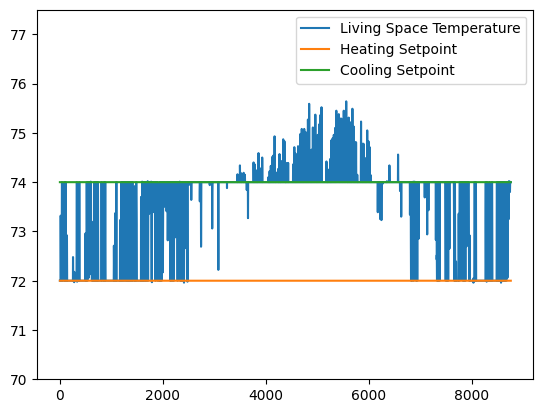

In [19]:
# Inital Plot
atx_df['My Design - Temperature| Living Space'].plot(label = "Living Space Temperature")
atx_df['My Design - Temperature| Heating Setpoint'].plot(label="Heating Setpoint")
atx_df['My Design - Temperature| Cooling Setpoint'].plot(label="Cooling Setpoint")
plt.legend()
plt.ylim(70,77.5)
plt.show()

In [20]:
# Creating a plotting function for notebook"
def plot_hvac(df, plt_title="Temperature and HVAC Loads Over Time", plt_ylabel = "Temperature", plt_xlabel = "Time", fill = False):
    living_temp = df['My Design - Temperature| Living Space']
    heating_set = df['My Design - Temperature| Heating Setpoint']
    cooling_set = df['My Design - Temperature| Cooling Setpoint']

    living_temp.plot(label = "Living Space Temperature")
    heating_set.plot(label="Heating Setpoint")
    cooling_set.plot(label="Cooling Setpoint")

    # Adding fill Option
    if fill:
        plt.fill_between(df.index, living_temp, cooling_set, where=living_temp>cooling_set, color='pink', label="Supplment Needed")

        # Doing the same for where temp is lower than heating set
        plt.fill_between(df.index, living_temp, heating_set, where=living_temp<heating_set, color='pink')
    
    plt.ylabel(plt_ylabel)
    plt.xlabel("Hours")

    #TODO: Set X ticks to intuitive time 
    
    plt.title(plt_title)
    plt.legend()
    plt.show()

Smoothing the graph by using into 24hour moving average. A more intuitive method may be to break the plot into 24 hour chunks and average those rather than a moving average, which we can try next.

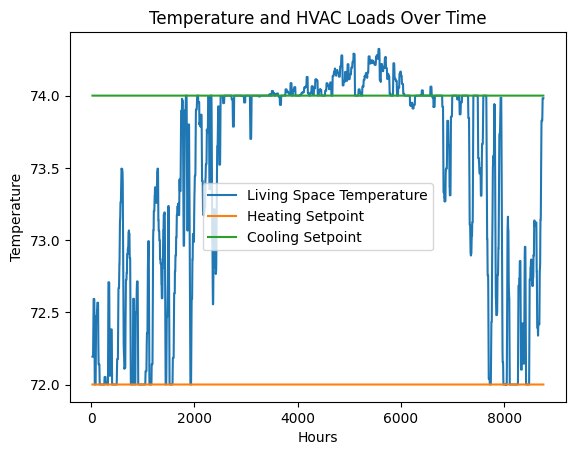

In [21]:
atx_daily_df = atx_df.rolling(24).mean()

# Re-plotting
plot_hvac(atx_daily_df)

Want to highlight the time where the the loads are not being met - highlighting zones where supplemental heating/cooling would be needed.

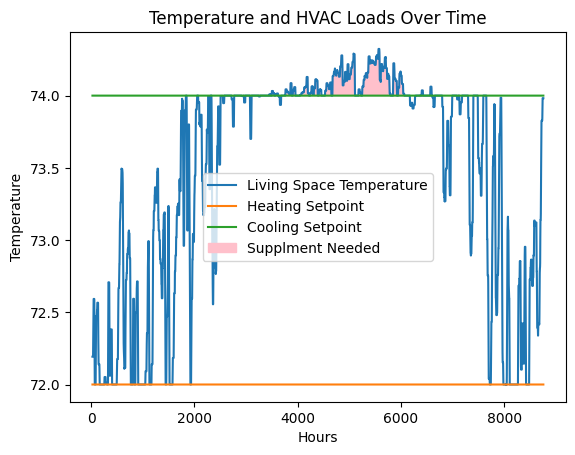

In [22]:
plot_hvac(atx_daily_df, fill=True)